### Code that produces the upsetplot in fig. 5D: Overlap between quantified ions of the current public DDA ion quant module

In [10]:
import pandas as pd
from pathlib import Path
import upsetplot

In [29]:
result_folder = "results/"
min_quant_runs = 6

TBD: get result performance files for benchmark runs, now it's placeholder files (sage runs from example) \
`result_folder` should contain the result_performance tables that the benchmark function returns (the first return value)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

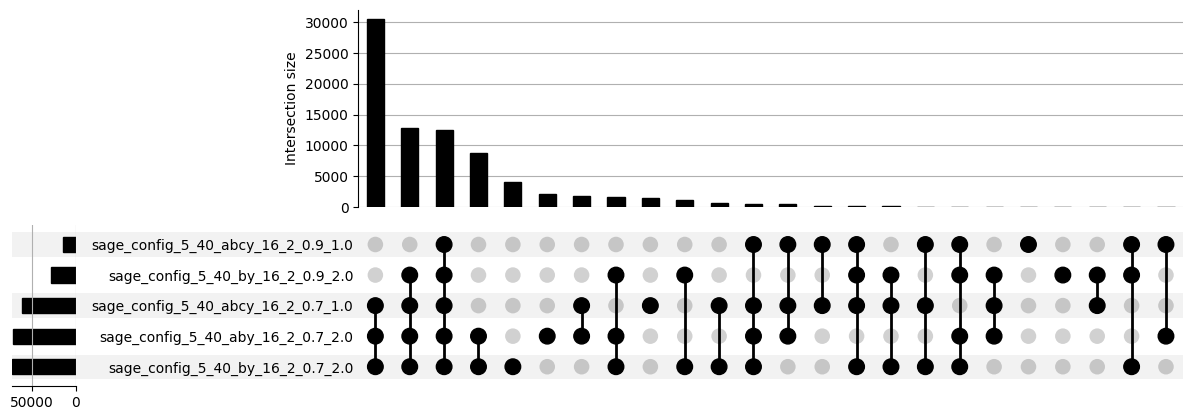

In [42]:
result_folder = "results/"
pathlist = Path(result_folder).rglob('result_performance_*.csv')
quantified_ion_dfs = []

max_runs = 5
current_run = 0

for path in pathlist:
    path_in_str = str(path)
    performance = pd.read_csv(path_in_str)
    performance["run"] = path.stem.replace("result_performance_", "sage_")
    performance = performance[performance["nr_observed"] >= min_quant_runs]
    quantified_ion_dfs.append(performance)
    current_run += 1
    if current_run >= max_runs:
        break

quantified_ions = pd.concat(quantified_ion_dfs)

ions = quantified_ions.groupby('precursor ion').agg({'run': lambda x: ', '.join(x)}).reset_index()
ions_by_run = upsetplot.from_memberships(ions.run.str.split(", "), data=ions)
upsetplot.UpSet(ions_by_run, orientation='horizontal', sort_by="cardinality").plot()

# Options:

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

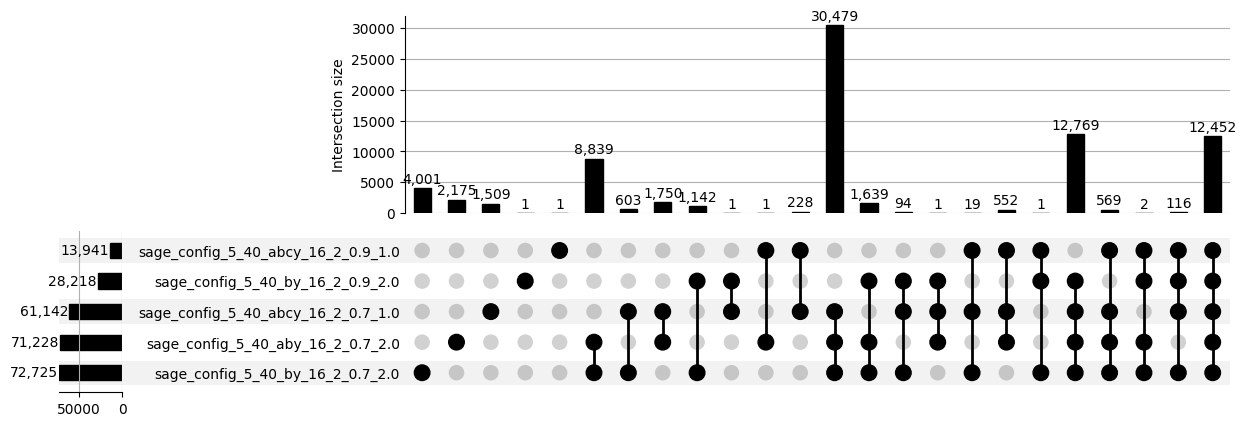

In [43]:
upsetplot.UpSet(ions_by_run, orientation='horizontal', show_counts="{:,}").plot()

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

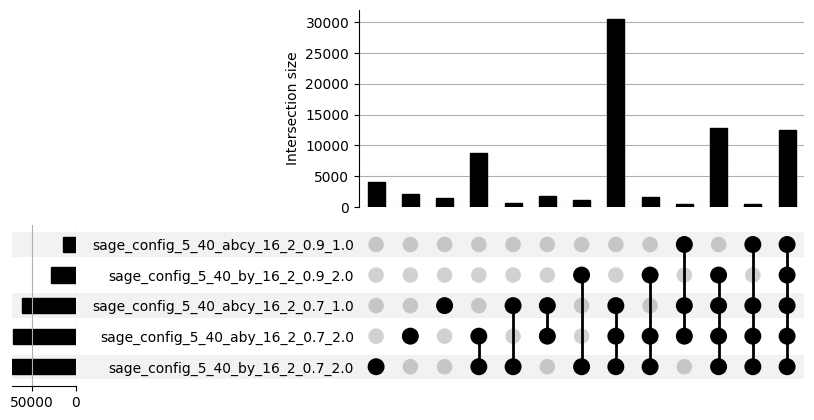

In [44]:
upsetplot.UpSet(ions_by_run, min_subset_size=500).plot()

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: xlabel='Intersection size'>}

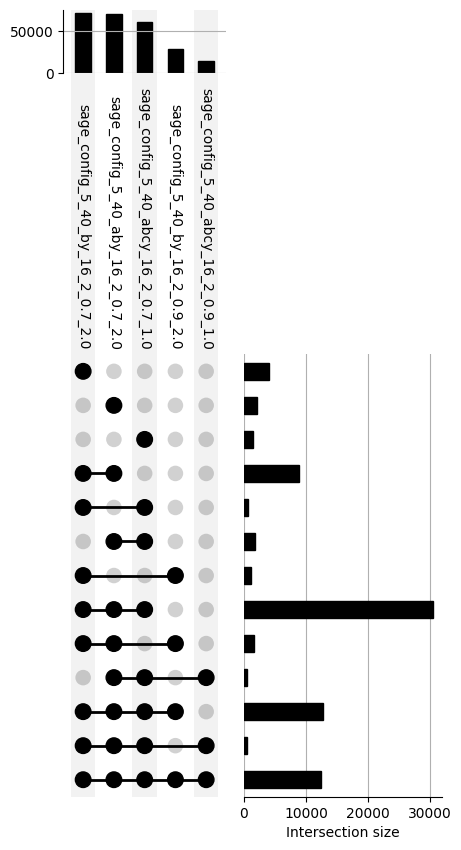

In [45]:
upsetplot.UpSet(ions_by_run, orientation='vertical', min_subset_size=500).plot()